# Make Aerosol Database
## WIP


POSEIDON currently uses a precomputed aerosol database that stores aerosol Mie scattering properties in it, that retrievals can then pull from. 

This notebook will teach you whats precomputed for the database, how to add your own aerosols into the database, and how to change some assumptions that are currently in the code. 

## Mie Aerosol Types

Aerosols in the database are computed from the refractive indices found in 
- Wakeford & Sing 2014 (https://arxiv.org/abs/1409.7594)
- Kitzmann & Heng 2017 (https://arxiv.org/abs/1710.04946)
- gcmCRT (https://github.com/ELeeAstro/gCMCRT/tree/main/data/nk_tables)
- Burningham 2021 (https://arxiv.org/pdf/2105.04268)
- Misc (see Mullens 2024)

Each aerosol in the database has their effective extinction cross section ($\sigma_{eff,ext}$), effective absorption cross section ($\sigma_{eff,abs}$), effective scattering cross section ($\sigma_{eff,scat}$), effective back scattering cross section ($\sigma_{eff,back}$), effective asymmetry parameter ($g$), and effective single scattering albedo ($\omega$) calculated covering wavelengths from 0.2 to 30 um and particle sizes 0.001 to 10 um (log -3 to 1). 

Particles are assumed to be in a log normal distribution with a width of 0.1 centered around the particle size recorded in the database. 
Aerosols are given a cross section of 0 in regions where refractive index lab data did not span the full 0.2-30 um. 

Cross sections were computed via the python LX-MIE algorithm, and functional forms from PyMieScatt 
- LX-MIE Algorithm (Kitzmann & Heng 2017, https://arxiv.org/abs/1710.04946)
- PLATON Aerosol Implementation (Zhang et al 2018, https://arxiv.org/abs/1811.11761)
- PyMieScatt Mie Efficiences (https://pymiescatt.readthedocs.io/en/latest/forward.html)

For more details, see Mullens 2024.

# Making the Database

POSEIDON v1.2 will come with a precomputed aerosol database with species found in Mullens 2024. 

When adding new species to the database, the database will have to be regenerated. This is how.  

1. Put all relevant jumbo_Mie.npy files in the aerosol_Mie_properties folder in the inputs/opacity folder.
2. Run the following code below

Note that you might have to delete, or move the current aerosol_emission_database.hdf5 file in the opacity folder so that its not overwritten.

In [1]:
from POSEIDON.clouds import make_aerosol_database

make_aerosol_database()

---------------------
Loading in .npy files from
/Users/elijahmullens/Desktop/Poseidon-V1-1/inputs/opacity/aerosol_Mie_properties/
---------------------
---------------------
Generating database from the following aerosols
---------------------
Fe
MgSiO3
MgSiO3_g_w_calc_mean
MgSiO3_g_w_calc_trap
MgSiO3_r_m_std_dev_01
SiO2
---------------------
Saving new aerosol database as
/Users/elijahmullens/Desktop/Poseidon-V1-1/inputs/opacity/aerosol_database_emission.hdf5
---------------------


## Querying Aerosols in the Database 

Lets check the available species in the database.

In [1]:
from POSEIDON.supported_chemicals import aerosol_supported_species

print(aerosol_supported_species)

['ADP' 'Al2O3' 'Al2O3_KH' 'C' 'CH4' 'CaTiO3' 'CaTiO3_KH' 'Cr'
 'ExoHaze_1000xSolar_300K' 'ExoHaze_1000xSolar_400K' 'Fe' 'Fe2O3'
 'Fe2SiO4_KH' 'FeO' 'FeS' 'FeSiO3' 'H2O' 'H2SO4' 'Hexene' 'Hibonite'
 'IceTholin' 'KCl' 'Mg2SiO4_amorph_sol_gel' 'Mg2SiO4_amorph'
 'Mg2SiO4_Fe_poor' 'Mg2SiO4_Fe_rich' 'Mg2SiO4_crystalline'
 'Mg4Fe6SiO3_amorph_glass' 'Mg5Fe5SiO3_amorph_glass'
 'Mg8Fe12SiO4_amorph_glass' 'Mg8Fe2SiO3_amorph_glass' 'MgAl2O4'
 'MgFeSiO4_amorph_glass' 'MgO' 'MgSiO3_amorph' 'MgSiO3_crystalline'
 'MgSiO3' 'MgSiO3_amorph_glass' 'MgSiO3_sol_gel' 'MnS' 'MnS_KH' 'MnS_Mor'
 'Na2S' 'NaCl' 'NanoDiamonds' 'NH3' 'NH4SH' 'S8' 'Saturn-Phosphorus-Haze'
 'SiC' 'SiO' 'SiO2' 'SiO2_amorph' 'SiO2_crystalline_2023' 'Soot'
 'Soot_6mm' 'Tholin' 'Tholin-CO-0625' 'Tholin-CO-1' 'TiC' 'TiO2_anatase'
 'TiO2_rutile' 'VO' 'ZnS']


Lets query the database directly.

In [2]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 

species = 'MgSiO3'

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 30      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
aerosol_grid = load_aerosol_grid([species])

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = 0.01

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, [r_m], [species],)

# Lets load in the cross sections, asymmetry parameter, and single scattering albedo 
eff_ext = sigma_Mie_interp_array[species]['eff_ext']
eff_abs = sigma_Mie_interp_array[species]['eff_abs']
eff_scat = sigma_Mie_interp_array[species]['eff_scat']
eff_back = sigma_Mie_interp_array[species]['eff_back']
eff_w = sigma_Mie_interp_array[species]['eff_w']
eff_g = sigma_Mie_interp_array[species]['eff_g']

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1493: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


Reading in database for aerosol cross sections...


We will plot the effective extinction cross section, single scattering albedo, and asymmetry parameter. 

Currently, these are the only parameters that are being used in the forward models and retrievals. 

The effective extinction cross section is the total loss of photons due to scattering and absorption processes.

The single scattering albedo ($\omega$) describes how 'forward-scattering' an aerosol is. 0 = Rayleigh limit (isotropic scattering) vs 1 = Forward Scattering. 

The asymmetry parameter ($g$) describes if an aerosol acts primarily as an absorber or a scatterer (0 = completely absorbs, 1 = completely scatters). This parameter can go negative, which means that its 'adding' photos back into the beam. 

$\omega$ and $g$ are used in emission geometries where multiple and forwarding scattering processes are important to consider. 

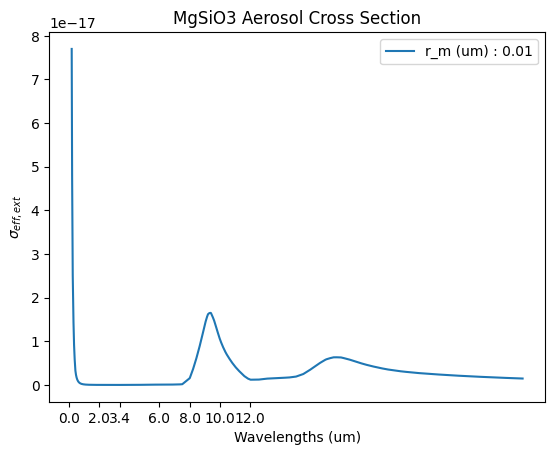

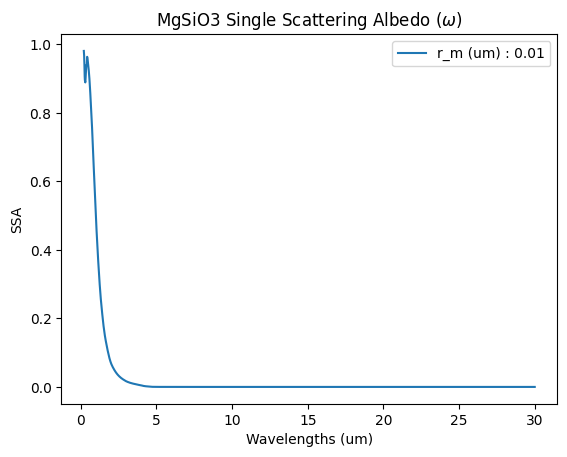

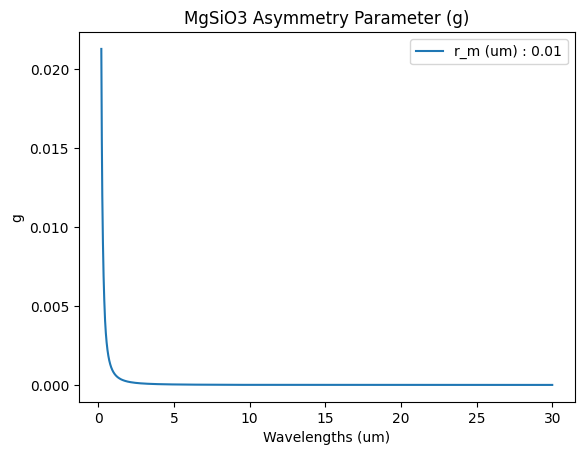

In [3]:
label = 'r_m (um) : ' + str(r_m)
title = species + ' Aerosol Cross Section'

plt.plot(wl,eff_ext, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('$\sigma_{eff,ext}$')
plt.xticks((0,2,3.4,6,8,10,12))
plt.show()

title = species + ' Single Scattering Albedo ($\omega$)'
plt.plot(wl,eff_w, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('SSA')
plt.show()


title =species + ' Asymmetry Parameter (g)'
plt.plot(wl,eff_g, label = label)
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('g')
plt.show()

There also exists a funciton to plot out a 'snapshot' of aerosol properties for an aerosol in the database. 

In [4]:
import os

os.getcwd()

'/Users/elijahmullens/Desktop/POSEIDON-V1-1/docs/content/notebooks/POSEIDON-V12'

MgSiO3
Reading in database for aerosol cross sections...
Loading in :  ../../../../refractive_indices_txt_files/File_names_corresponding_to_name_in_supported_species/MgSiO3.txt


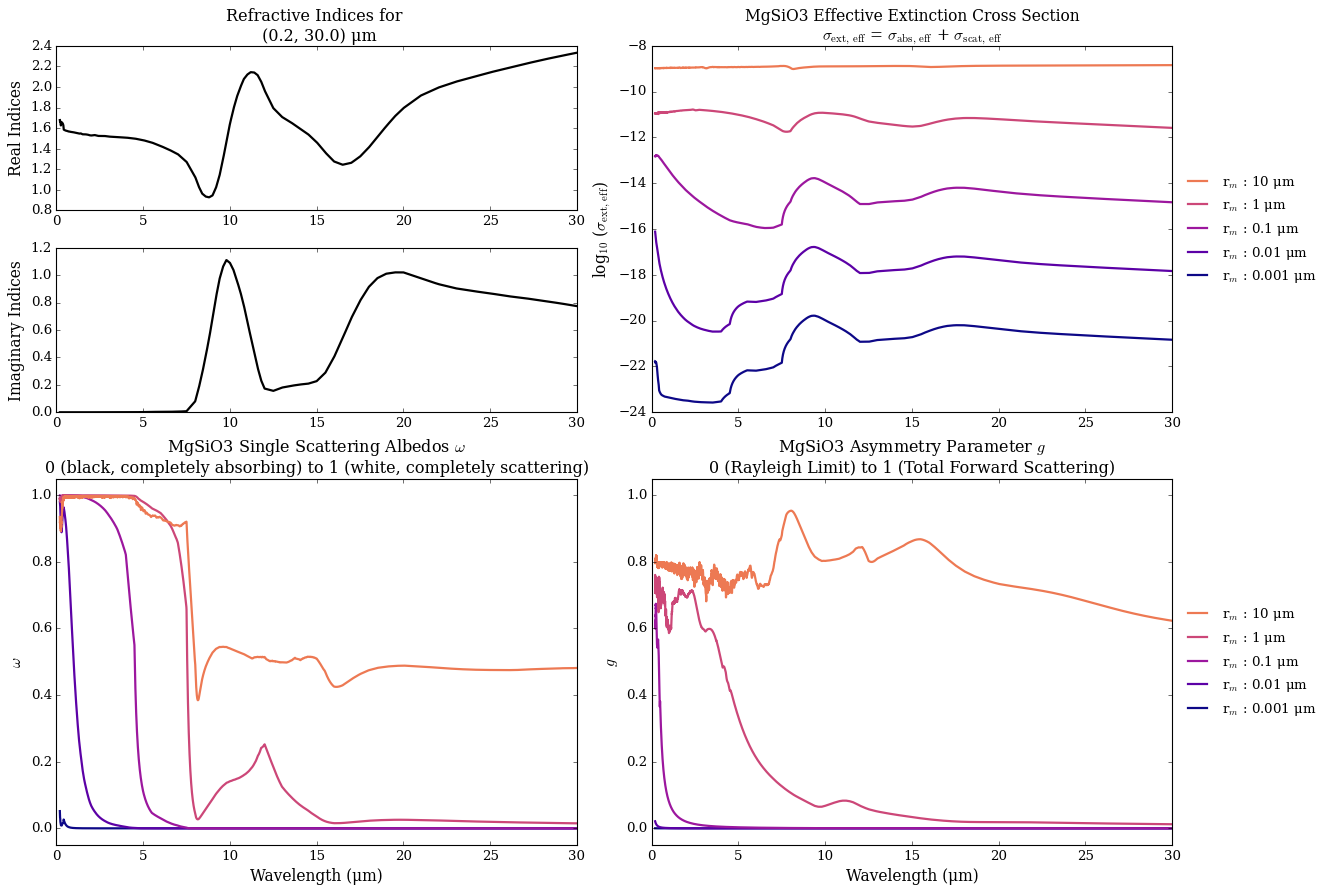

In [1]:
from POSEIDON.clouds import database_properties_plot

# All the refractive index txt files with names corresponding to their name in supported_species.py are
# found in /refractive_indices_txt_files/File_names_corrsponding_to_name_in_supported_species/

file_name = '../../../../refractive_indices_txt_files/File_names_corresponding_to_name_in_supported_species/MgSiO3.txt'

database_properties_plot(file_name)

# Directly adding an aerosol to the database

This option is reccomended if retrievals will be run using some lab data. 

To add your own lab data to the database for personal use, run the following code below

I would reccomend writing a .py script and running this command alone in a terminal.

Ensure that the two first lines being a header, or that the headers are commented out with '#'.
The first column being wavelengths (um), second column being the real indices, and the third column being the imaginary indices.

If your lab data is in wavenumber, make sure to convert using wavelength (um) = 1e4/wavenumber (cm-1)

Computing the npy array of cross sections should take about a day. However, good news is that you only have to do it once!

The jumbo_Mie.npy file, as well as many auxillary files, will be saved in the /inputs/opacity/precomputed_Mie_properties folder

To add your aerosol to the database, place the jumbo_Mie .npy file in the /inputs/opacity/aerosol_Mie_properties folder and rerun make_aerosol_database().

Make sure to update supported_species.py

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol

file_name = './H2O_complex.txt'

# Takes in the file name with the path to it, and the name you want the aerosol to have in the database
precompute_cross_sections_one_aerosol(file_name,'H2O')

# Changing Assumptions - Advanced

1. Changing the particle size distribution 
2. Changing w and g calculations 
3. Changing the min and max particle sizes claculated

In this section, we will look at how to change some assumptions that are 'baked' into POSEIDON when precomputing aerosol properties. 

## 1. Changing Particle Size Distribution 

Currrently, POSEIDON assumes a log-normal particle size distribution with a width of 0.5, where the individual points on the plot below represent the sides that are integrated over. 

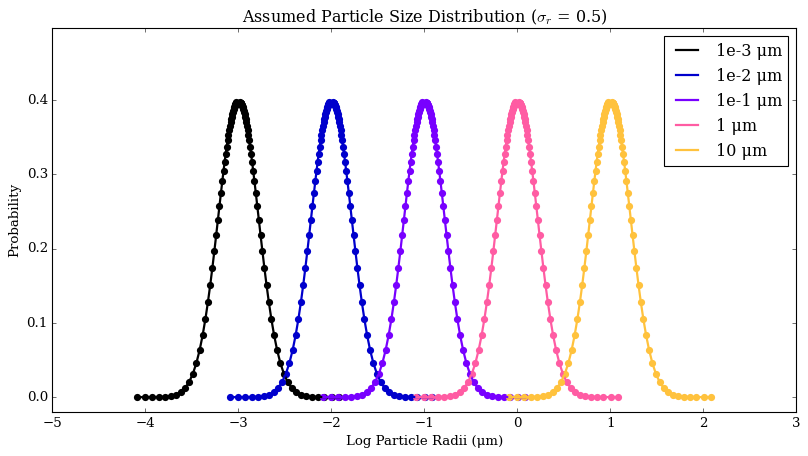

In [1]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution()

However, one might want to explore a different width of the distribution (i.e. to 1 or 0.1 instead of 0.5). To do this use the following code.

We reccomend changing the name so that its obvious that the width is different. 

WARNING: The LX-MIE and PLATON algorithms not optimized for large particle sizes, and therefore larger particle size distributions will take substantially longer to precompute. 

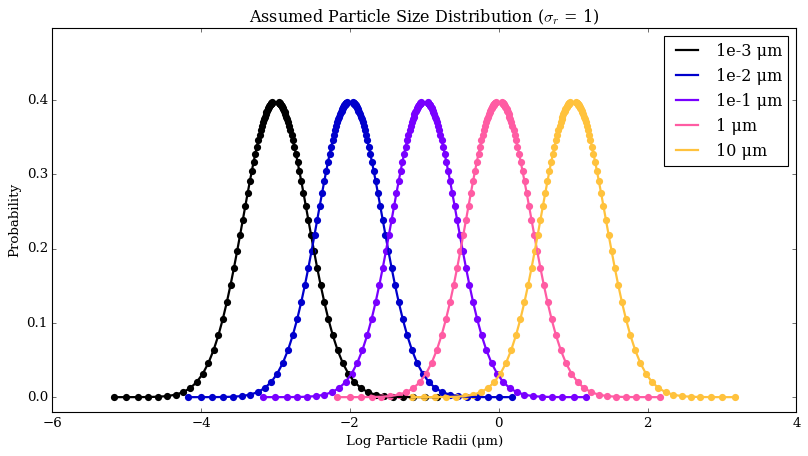

In [2]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution(r_m_std_dev = 1)

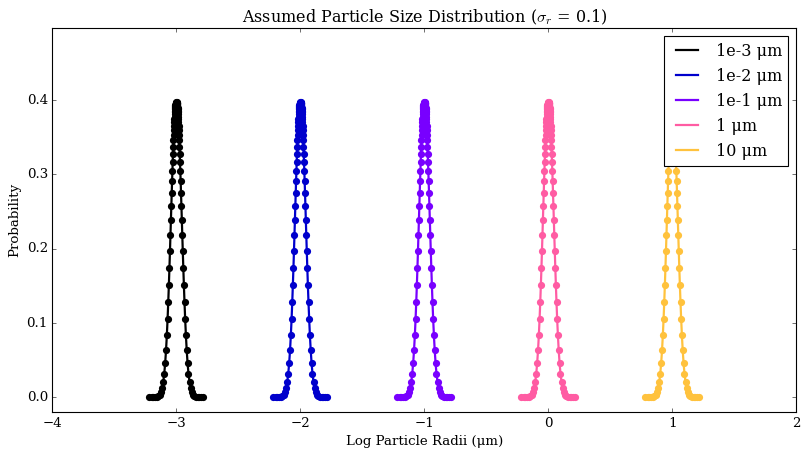

In [3]:
from POSEIDON.clouds import plot_lognormal_distribution

plot_lognormal_distribution(r_m_std_dev = 0.1)

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_custom

file_name = './H2O_complex.txt'

precompute_cross_sections_one_aerosol_custom(file_name, 'H2O_r_m_std_dev_1',
                                                        r_m_std_dev = 1)

WIP Lets see how cross sections differ using MgSiO3 (0.1, 0.5, 1, 2)

In [5]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 

species = ['MgSiO3','MgSiO3_r_m_std_dev_01']

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 30      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
aerosol_grid = load_aerosol_grid(species)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = [0.01,0.01]

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, r_m, species)

# Lets load in the cross sections of each distribution
eff_ext_MgSiO3 = sigma_Mie_interp_array['MgSiO3']['eff_ext']
eff_ext_MgSiO3_01 = sigma_Mie_interp_array['MgSiO3_r_m_std_dev_01']['eff_ext']

Reading in database for aerosol cross sections...


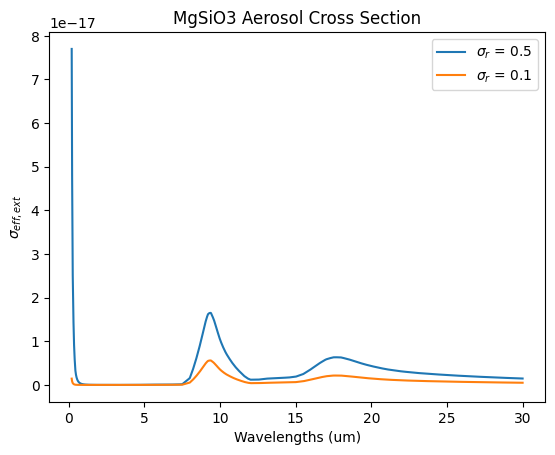

In [7]:
title = 'MgSiO3 Aerosol Cross Section'

plt.plot(wl,eff_ext_MgSiO3, label = '$\sigma_r$ = 0.5')
plt.plot(wl,eff_ext_MgSiO3_01, label = '$\sigma_r$ = 0.1')
plt.legend()
plt.title(title)
plt.xlabel('Wavelengths (um)')
plt.ylabel('$\sigma_{eff,ext}$')
plt.show()


## 2. Changing w and g calculations 

At the present, POSEIDON computes the effective extinction cross section using an integral over the lognormal distribution, while the asymmetry parameter and single scattering albedo use the median.

I.e. 

            eff_ext_cross_section[idx_start:idx_end] = np.trapz(probs*geometric_cross_sections*Qext_intpl, z)
            eff_w[idx_start:idx_end] = np.median(w_intpl, axis=1)
            eff_g[idx_start:idx_end] = np.median(g_intpl, axis=1)

If one wishes to change this assumption, they can use the same 'custom' function as above. Currently, we support 'median', 'mean', and 'trap'

        if g_w_calc == 'median':
            eff_w[idx_start:idx_end] = np.median(w_intpl, axis=1)
            eff_g[idx_start:idx_end] = np.median(g_intpl, axis=1)

        elif g_w_calc == 'mean':
            eff_w[idx_start:idx_end] = np.mean(w_intpl, axis=1)
            eff_g[idx_start:idx_end] = np.mean(g_intpl, axis=1)     
        
        elif g_w_calc == 'trap':
            eff_w[idx_start:idx_end] = np.trapz(probs*w_intpl, z)
            eff_g[idx_start:idx_end] = nnp.trapz(probs*g_intpl, z) 

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_custom

file_name = './H2O_complex.txt'

precompute_cross_sections_one_aerosol_custom(file_name, 'H2O_w_g_trap',
                                                        g_w_calc = 'mean')

precompute_cross_sections_one_aerosol_custom(file_name, 'H2O_w_g_trap',
                                                        g_w_calc = 'trap')

WIP Lets see how cross sections differ using MgSiO3 (median vs mean vs trap for 0.5)

In [4]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.clouds import load_aerosol_grid, interpolate_sigma_Mie_grid
import matplotlib.pyplot as plt 

species = ['MgSiO3','MgSiO3_g_w_calc_mean','MgSiO3_g_w_calc_trap']

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 30      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Load in the grid 
aerosol_grid = load_aerosol_grid(species)

# Test to see if the cross sections come out with SiO2 particle, 0.01 um sized
r_m = [0.01,0.01,0.01]

# This formula loads in the grid 
sigma_Mie_interp_array = interpolate_sigma_Mie_grid(aerosol_grid, wl, r_m, species)

# Lets load in the cross sections of each computation method
eff_w_MgSiO3 = sigma_Mie_interp_array['MgSiO3']['eff_w']
eff_w_MgSiO3_mean = sigma_Mie_interp_array['MgSiO3_g_w_calc_mean']['eff_w']
eff_w_MgSiO3_trap = sigma_Mie_interp_array['MgSiO3_g_w_calc_trap']['eff_w']

eff_g_MgSiO3 = sigma_Mie_interp_array['MgSiO3']['eff_g']
eff_g_MgSiO3_mean = sigma_Mie_interp_array['MgSiO3_g_w_calc_mean']['eff_g']
eff_g_MgSiO3_trap = sigma_Mie_interp_array['MgSiO3_g_w_calc_trap']['eff_g']

Reading in database for aerosol cross sections...


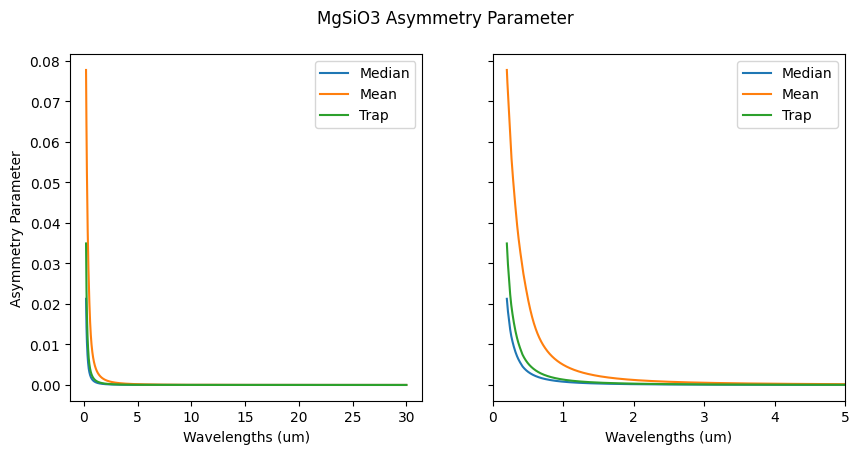

In [5]:
title = 'MgSiO3 Asymmetry Parameter'

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,4.5))

plt.suptitle(title)

ax1.plot(wl,eff_g_MgSiO3, label = 'Median')
ax1.plot(wl,eff_g_MgSiO3_mean, label = 'Mean')
ax1.plot(wl,eff_g_MgSiO3_trap, label = 'Trap')

ax2.plot(wl,eff_g_MgSiO3, label = 'Median')
ax2.plot(wl,eff_g_MgSiO3_mean, label = 'Mean')
ax2.plot(wl,eff_g_MgSiO3_trap, label = 'Trap')
ax2.set_xlim((0,5))

ax1.legend()
ax2.legend()

ax1.set_xlabel('Wavelengths (um)')
ax2.set_xlabel('Wavelengths (um)')

ax1.set_ylabel('Asymmetry Parameter')

plt.show()

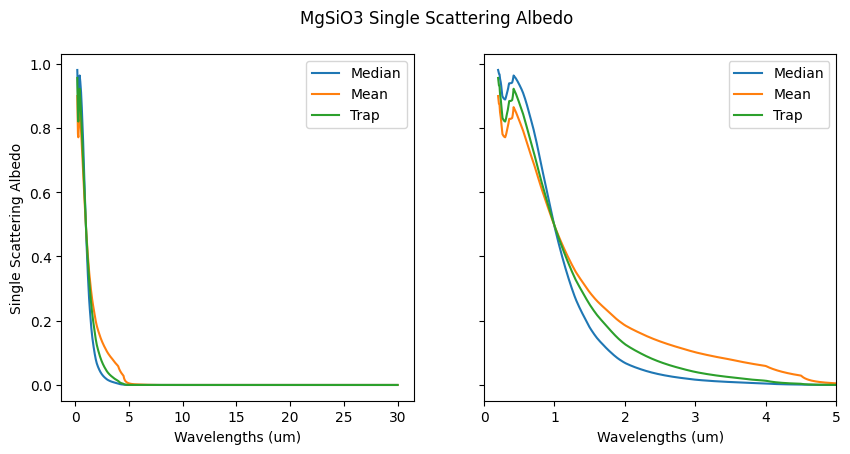

In [6]:
label = 'r_m (um) : ' + str(r_m)
title = 'MgSiO3 Single Scattering Albedo'

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,4.5))

plt.suptitle(title)

ax1.plot(wl,eff_w_MgSiO3, label = 'Median')
ax1.plot(wl,eff_w_MgSiO3_mean, label = 'Mean')
ax1.plot(wl,eff_w_MgSiO3_trap, label = 'Trap')

ax2.plot(wl,eff_w_MgSiO3, label = 'Median')
ax2.plot(wl,eff_w_MgSiO3_mean, label = 'Mean')
ax2.plot(wl,eff_w_MgSiO3_trap, label = 'Trap')
ax2.set_xlim((0,5))

ax1.legend()
ax2.legend()

ax1.set_xlabel('Wavelengths (um)')
ax2.set_xlabel('Wavelengths (um)')

ax1.set_ylabel('Single Scattering Albedo')

plt.show()

# 3. Changing radii computed 

The assumed min and max radius is 1e-3 and 10 um, respectively. If one wishes, they can precomputed radii beyond that range utilizing the same 'custom' function as above

However, the current make_aersosol_database() function does assume that r_m ranges from 1e-3 to 10 um. If a user wishes to define their own grid bounds and use it in retrievals, feel free to reach out to the developers for more information.

But the way you would do it is: 

1. Change the r_m_array in make_aerosol_database() in clouds.py (or just make a new function from that one)
2. Make new database with new name 
3. In define_model() in core.py, add an optional argument where you can change which grid is loaded in 
4. Still in core.py, find where the aerosol grid is loaded in and make a few fancy if statements depending on the optional argument
5. Go to load_aerosol_grid() in clouds.py and edit so it knows how and where to open your new grid

In [ ]:
from POSEIDON.clouds import precompute_cross_sections_one_aerosol_custom

file_name = './H2O_complex.txt'

precompute_cross_sections_one_aerosol_custom(file_name, 'H2O_1e-4_100_um',
                                                        r_m_std_dev = 0.5,
                                                        log_r_m_min = -4,
                                                        log_r_m_max = 2,
                                                        g_w_calc = 'median')

WIP Lets see how cross sections differ using MgSiO3 (median, 0.5, -4 to 2)

# Extra - Mie calculations and Distribution 

The LX-Mie algorithm assumes spherical, homogenous particles. Feel free to go into precompute_cross_sections_one_aerosol() in clouds.py and input your own aerosol property computing code (i.e., distribution of hollow spheres (DHS), oblate spherhoids, continous distribution of ellipsoidal shapes (CDE), fractal aggregates, etc.). Main thing is that the effective extinction coefficient is computed, as well as the asymmetry parameter and single scattering albedo. 

Additionally, feel free to go into that function and change the lognormal distribution to another distribution (potential exponential, Hansen distribution, etc). Any distribution of particles should work with the current LX-MIE algorithm, just change the following variables in the precompute_cross_sections_one_aerosol() function (LX-MIE just needs to know which radii to compute, and the integrals for the effective cross sections need to know geoemtric cross sections and probabilities)

        z = -np.logspace(np.log10(0.1), np.log10(z_max), int(num_integral_points/2)) 
        z = np.append(z[::-1], -z)

        probs = np.exp(-z**2/2) * (1/np.sqrt(2*np.pi))
        radii = r_m * np.exp(z * r_m_std_dev) # This takes the place of rm * exp(sigma z)
        geometric_cross_sections = np.pi * (radii*1e-6)**2 # Needs to be in um since its geometric